## Question 1 - Use yfinance to Extract Stock Data

In [17]:
import yfinance as yf
tesla = yf.Ticker('TSLA')

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<br><br>

## Question 2 - Use Webscraping to Extract Tesla Revenue Data

In [26]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html5lib")

In [27]:
# Import pandas
import pandas as pd

# Use the 'concat' method instead of 'append' to add data to the DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")

            # Use 'concat' to add data to the DataFrame
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})], ignore_index=True)

In [28]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


<br><br>

## Question 3 - Use yfinance to Extract Stock Data

In [30]:
gme = yf.Ticker('GME')
gme_data = gme.history(period = "max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<br><br>

## Question 4: Use Webscraping to Extract GME Revenue Data

In [31]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html5lib")

In [33]:
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")

            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})], ignore_index=True)


In [34]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


<br><br>

## Question 5: Plot Tesla Stock Graph

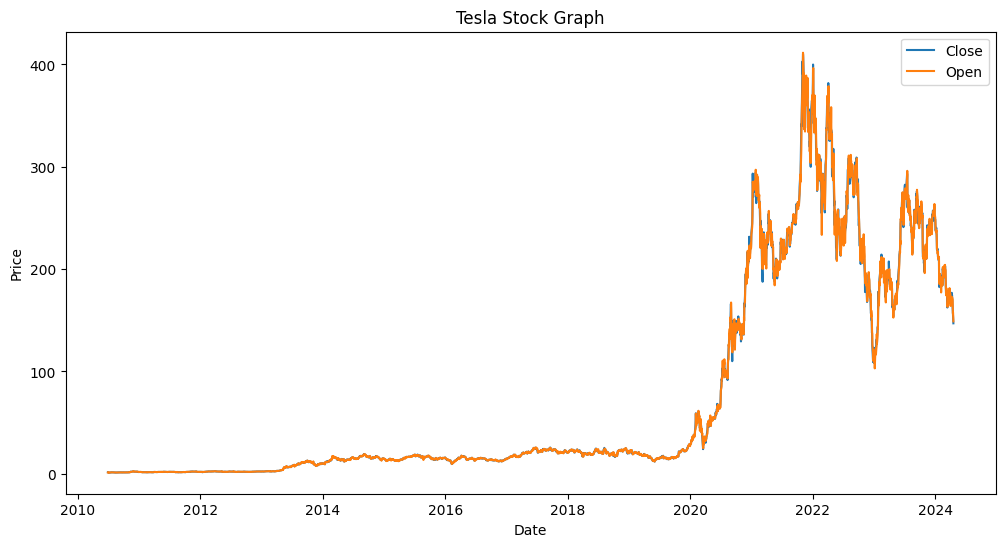

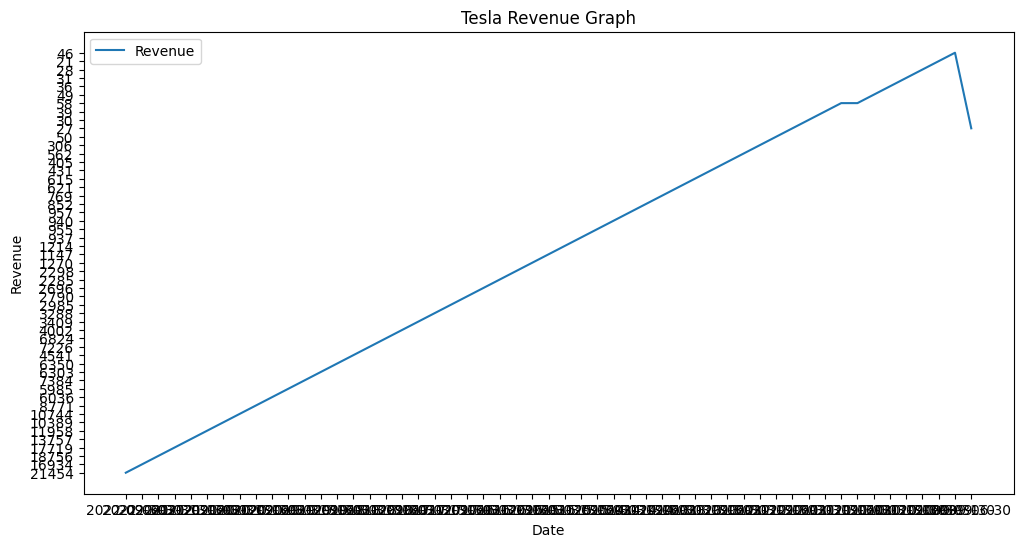

In [41]:
import matplotlib.pyplot as plt
def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data["Date"], stock_data["Close"], label="Close")
    plt.plot(stock_data["Date"], stock_data["Open"], label="Open")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(stock_name + " Stock Graph")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(revenue_data["Date"], revenue_data["Revenue"], label="Revenue")
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.title(stock_name + " Revenue Graph")
    plt.legend()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')


<br><br>

## Question 6: Plot GameStop Stock Graph

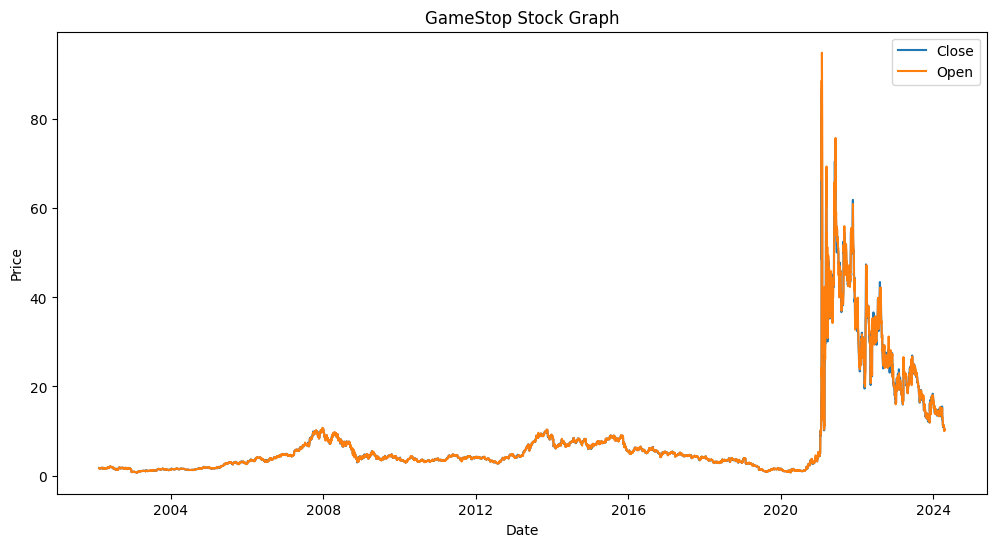

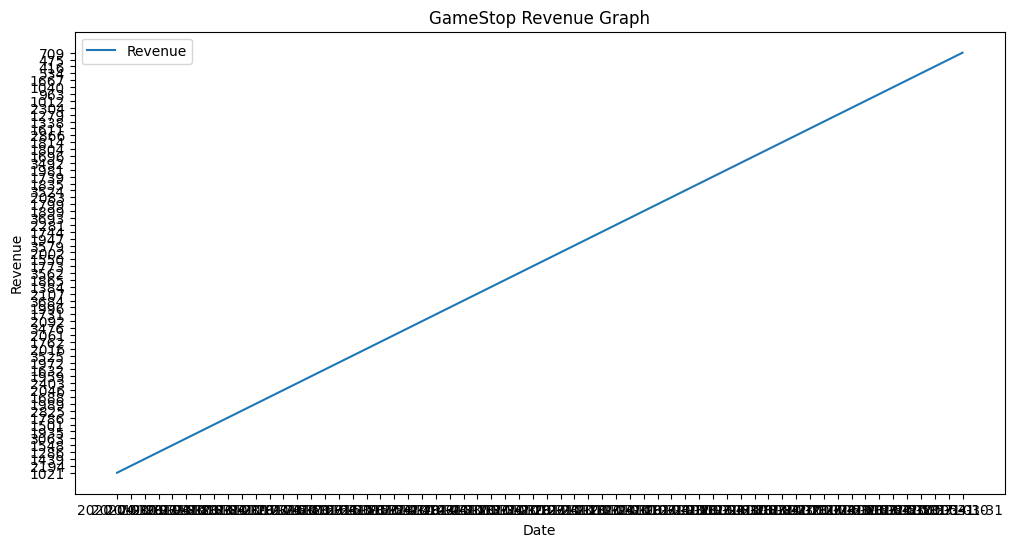

In [42]:
import matplotlib.pyplot as plt
def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data["Date"], stock_data["Close"], label="Close")
    plt.plot(stock_data["Date"], stock_data["Open"], label="Open")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(stock_name + " Stock Graph")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(revenue_data["Date"], revenue_data["Revenue"], label="Revenue")
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.title(stock_name + " Revenue Graph")
    plt.legend()
    plt.show()

make_graph(gme_data, gme_revenue, 'GameStop')
